## 1.Поиск и выбор набора данных для построения моделей машинного обучения

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math as mth
import matplotlib.patches as patches
from scipy import stats as st
plt.rcParams.update({'figure.max_open_warning': 0})

import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

In [37]:
df = pd.read_csv('goal.csv')

In [38]:
df.head()

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,(BAR),Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,(ATL),Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,La Liga,(CAR),Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,La Liga,(VAL),Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  660 non-null    object 
 1   League                   660 non-null    object 
 2   Club                     626 non-null    object 
 3   Player Names             660 non-null    object 
 4   Matches_Played           660 non-null    int64  
 5   Substitution             660 non-null    int64  
 6   Mins                     660 non-null    int64  
 7   Goals                    660 non-null    int64  
 8   xG                       660 non-null    float64
 9   xG Per Avg Match         660 non-null    float64
 10  Shots                    660 non-null    int64  
 11  OnTarget                 660 non-null    int64  
 12  Shots Per Avg Match      660 non-null    float64
 13  On Target Per Avg Match  660 non-null    float64
 14  Year                     6

## 2.Проведение разведочного анализа данных.

In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Matches_Played,660.0,22.371212,9.754658,2.00,14.000,24.000,31.0000,38.00
Substitution,660.0,3.224242,3.839498,0.00,0.000,2.000,5.0000,26.00
Mins,660.0,2071.416667,900.595049,264.00,1363.500,2245.500,2822.0000,4177.00
Goals,660.0,11.784848,5.982454,2.00,8.000,11.000,14.0000,37.00
xG,660.0,10.089606,5.724844,0.71,6.100,9.285,13.2525,32.54
xG Per Avg Match,660.0,0.476167,0.192831,0.07,0.340,0.435,0.5700,1.35
Shots,660.0,64.177273,34.941622,5.00,37.750,62.000,86.0000,208.00
OnTarget,660.0,28.365152,16.363149,2.00,17.000,26.000,37.0000,102.00
Shots Per Avg Match,660.0,2.948015,0.914906,0.80,2.335,2.845,3.3825,7.20
On Target Per Avg Match,660.0,1.315652,0.474239,0.24,0.980,1.250,1.5400,3.63


In [41]:
df.isna().sum()

Country                     0
League                      0
Club                       34
Player Names                0
Matches_Played              0
Substitution                0
Mins                        0
Goals                       0
xG                          0
xG Per Avg Match            0
Shots                       0
OnTarget                    0
Shots Per Avg Match         0
On Target Per Avg Match     0
Year                        0
dtype: int64

In [42]:
df.drop(columns=['Club'], inplace=True)

In [43]:
df.isna().sum()

Country                    0
League                     0
Player Names               0
Matches_Played             0
Substitution               0
Mins                       0
Goals                      0
xG                         0
xG Per Avg Match           0
Shots                      0
OnTarget                   0
Shots Per Avg Match        0
On Target Per Avg Match    0
Year                       0
dtype: int64

In [44]:
df.columns

Index(['Country', 'League', 'Player Names', 'Matches_Played', 'Substitution ',
       'Mins', 'Goals', 'xG', 'xG Per Avg Match', 'Shots', 'OnTarget',
       'Shots Per Avg Match', 'On Target Per Avg Match', 'Year'],
      dtype='object')

In [45]:
df.duplicated().sum()

0

In [46]:
int_types = ['int64', 'uint16', 'uint8']
for it in int_types:
    print(np.iinfo(it))

Machine parameters for int64
---------------------------------------------------------------
min = -9223372036854775808
max = 9223372036854775807
---------------------------------------------------------------

Machine parameters for uint16
---------------------------------------------------------------
min = 0
max = 65535
---------------------------------------------------------------

Machine parameters for uint8
---------------------------------------------------------------
min = 0
max = 255
---------------------------------------------------------------



In [47]:
df.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  660 non-null    object 
 1   League                   660 non-null    object 
 2   Player Names             660 non-null    object 
 3   Matches_Played           660 non-null    int64  
 4   Substitution             660 non-null    int64  
 5   Mins                     660 non-null    int64  
 6   Goals                    660 non-null    int64  
 7   xG                       660 non-null    float64
 8   xG Per Avg Match         660 non-null    float64
 9   Shots                    660 non-null    int64  
 10  OnTarget                 660 non-null    int64  
 11  Shots Per Avg Match      660 non-null    float64
 12  On Target Per Avg Match  660 non-null    float64
 13  Year                     660 non-null    int64  
dtypes: float64(4), int64(7), o

In [48]:
for dtype in ['float', 'int', 'object']:
    selected_dtype = df.select_dtypes(include=[dtype])
    mean_usage_b = selected_dtype.memory_usage(deep = True).mean()
    mean_usage_mb = mean_usage_b / 1024
    print("Занимаемая память типа {}: {:03.3f} KB".format(dtype, mean_usage_mb))

Занимаемая память типа float: 4.150 KB
Занимаемая память типа int: 4.527 KB
Занимаемая память типа object: 34.142 KB


In [49]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj, pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep = True).sum()
    else:
        usage_b = pandas_obj.memory_usage(deep = True)
    usage_mb = usage_b / 1024
    return "{:03.3f} KB".format(usage_mb)

In [50]:
df_int = df.select_dtypes(include=['int'])
converted_int = df_int.apply(pd.to_numeric,downcast='unsigned')

print(mem_usage(df_int))
print(mem_usage(converted_int))

compare_ints = pd.concat([df_int.dtypes,converted_int.dtypes],axis=1)
compare_ints.columns = ['before','after']
compare_ints.apply(pd.Series.value_counts)

36.219 KB
5.926 KB


,before,after
uint8,NaN,5.0
uint16,NaN,2.0
int64,7.0,NaN


In [51]:
df_float = df.select_dtypes(include=['float'])
converted_float = df_float.apply(pd.to_numeric,downcast='float')

print(mem_usage(df_float))
print(mem_usage(converted_float))

compare_floats = pd.concat([df_float.dtypes,converted_float.dtypes],axis=1)
compare_floats.columns = ['before','after']
compare_floats.apply(pd.Series.value_counts)

20.750 KB
10.438 KB


,before,after
float32,NaN,4.0
float64,4.0,NaN


In [52]:
optimized_df = df.copy()

optimized_df[converted_int.columns] = converted_int

print(mem_usage(df))
print(mem_usage(optimized_df))

193.286 KB
162.993 KB


In [53]:
df_obj = df.select_dtypes(include=['object']).copy()
df_obj.describe().T

,count,unique,top,freq
Country,660,9,Spain,100
League,660,28,La Liga,100
Player Names,660,444,Andrea Belotti,5


In [54]:
converted_obj = pd.DataFrame()
for col in df_obj.columns:
    num_unique_values = len(df_obj[col].unique())
    num_total_values = len(df_obj[col])
    if num_unique_values / num_total_values < 0.5:
        converted_obj.loc[:,col] = df_obj[col].astype('category')
    else:
        converted_obj.loc[:,col] = df_obj[col]

In [55]:
print(mem_usage(df_obj))
print(mem_usage(converted_obj))

compare_obj = pd.concat([df_obj.dtypes,converted_obj.dtypes],axis=1)
compare_obj.columns = ['before','after']
compare_obj.apply(pd.Series.value_counts)

136.567 KB
50.386 KB


,before,after
object,3.0,1
category,NaN,1
category,NaN,1


In [56]:
optimized_df[converted_obj.columns] = converted_obj
mem_usage(optimized_df)

'76.812 KB'

In [57]:
df = optimized_df

In [58]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Country                  660 non-null    category
 1   League                   660 non-null    category
 2   Player Names             660 non-null    object  
 3   Matches_Played           660 non-null    uint8   
 4   Substitution             660 non-null    uint8   
 5   Mins                     660 non-null    uint16  
 6   Goals                    660 non-null    uint8   
 7   xG                       660 non-null    float64 
 8   xG Per Avg Match         660 non-null    float64 
 9   Shots                    660 non-null    uint8   
 10  OnTarget                 660 non-null    uint8   
 11  Shots Per Avg Match      660 non-null    float64 
 12  On Target Per Avg Match  660 non-null    float64 
 13  Year                     660 non-null    uint16  
dtypes: categor

In [59]:
df.sample(10)

,Country,League,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
143,Germany,Bundesliga,Salomon Kalou,27,4,2272,12,9.33,0.39,50,23,2.09,0.96,2017
545,Italy,Serie A,Gaetano Castrovilli,9,0,755,4,1.43,0.18,11,7,1.38,0.88,2020
570,Germany,Bundesliga,Jean-Philippe Mateta,9,0,723,7,6.01,0.79,23,12,3.02,1.58,2020
97,Brazil,Campeonato Brasileiro SÃ©rie A,Pottker,19,12,2007,14,8.66,0.41,61,25,2.89,1.18,2016
359,Portugal,Primeira Liga,Alex Telles,3,0,280,2,2.36,0.80,9,5,3.05,1.70,2019
397,Italy,Serie A,Gianluca Lapadula,20,5,1906,11,9.43,0.47,61,24,3.04,1.20,2019
183,Spain,La Liga,Jaime Mata,27,7,2569,14,12.44,0.46,59,25,2.18,0.92,2018
315,USA,MLS,Raul Ruidiaz,24,2,2346,15,15.31,0.62,96,37,3.89,1.50,2019
467,Brazil,Campeonato Brasileiro SÃ©rie A,Everton,23,7,2498,11,9.20,0.35,83,32,3.16,1.22,2019
317,USA,MLS,Carlos Vela,33,0,3128,36,25.35,0.77,167,75,5.07,2.28,2019


In [60]:
df['AvgMinsGoals'] = df['Mins']/df['Goals']

In [61]:
df.head()

,Country,League,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year,AvgMinsGoals
0,Spain,La Liga,Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016,168.090909
1,Spain,La Liga,Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016,195.562500
2,Spain,La Liga,Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016,105.000000
3,Spain,La Liga,Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016,218.615385
4,Spain,La Liga,Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016,134.230769


In [62]:
top5_avg=df.pivot_table(index=['Player Names', 'Matches_Played', 'Goals'],
                        values = 'AvgMinsGoals',
                        aggfunc = 'sum').sort_values(by='AvgMinsGoals', ascending=True).head(5)
top5_avg = top5_avg.reset_index()
top5_avg

,Player Names,Matches_Played,Goals,AvgMinsGoals
0,Cristiano Ronaldo,5,8,49.625000
1,Zlatan Ibrahimovic,6,10,55.700000
2,Robert Lewandowski,7,12,56.000000
3,Haris Seferovic,2,6,56.166667
4,Luis Muriel,3,4,66.000000


Text(0, 0.5, 'Голы')

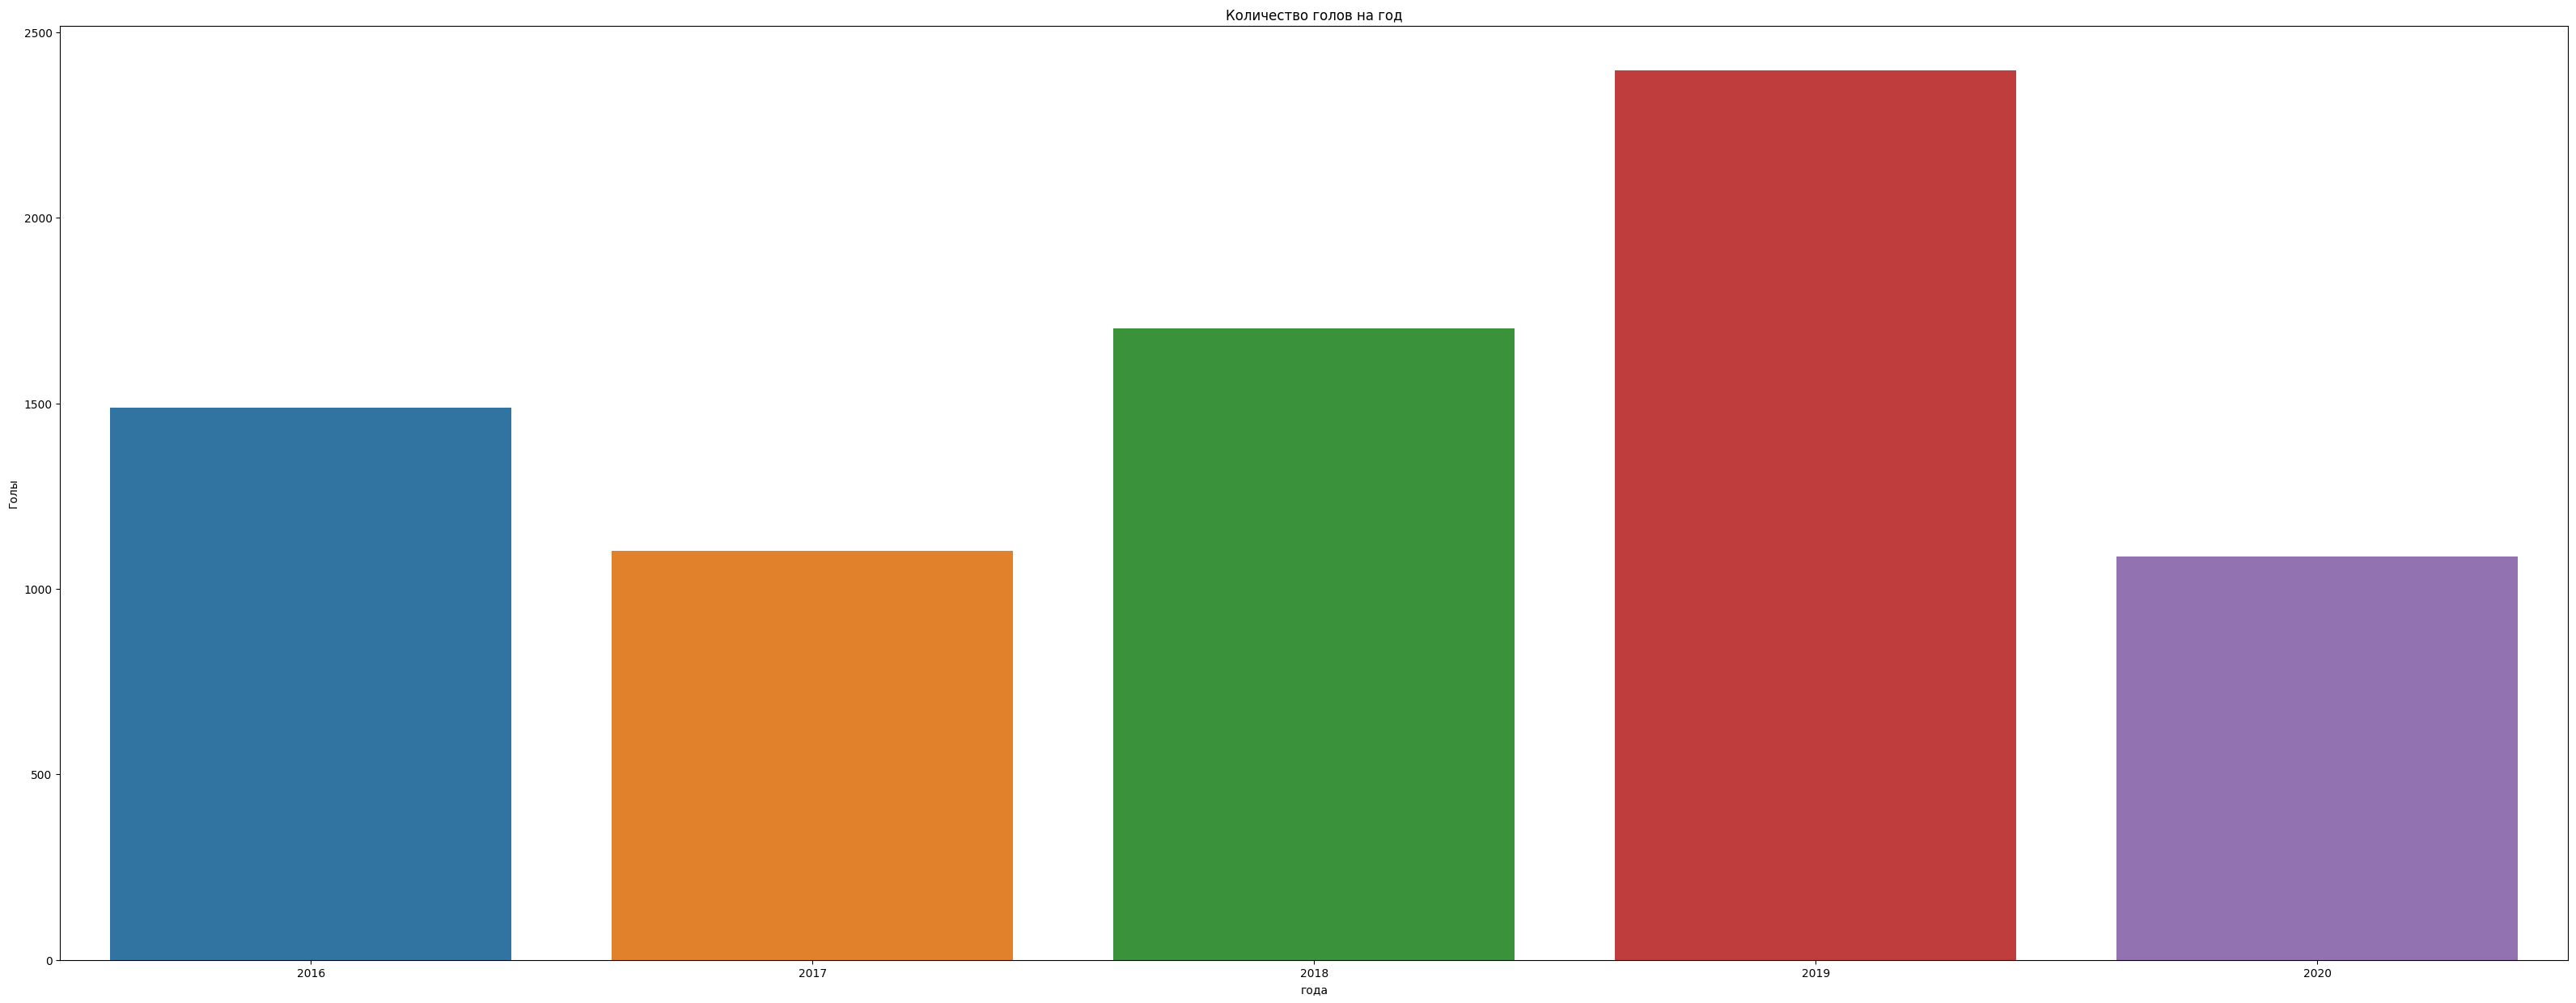

In [63]:
mean_purc = df.pivot_table(index='Year',
                        values = 'Goals',
                        aggfunc = 'sum').sort_values(by = 'Goals')
plt.figure(figsize=(40,15))
sns.barplot(x = mean_purc.index, y = mean_purc['Goals'])
plt.title('Количество голов на год')
plt.xlabel('года')
plt.ylabel('Голы')

Text(0, 0.5, 'Голы')

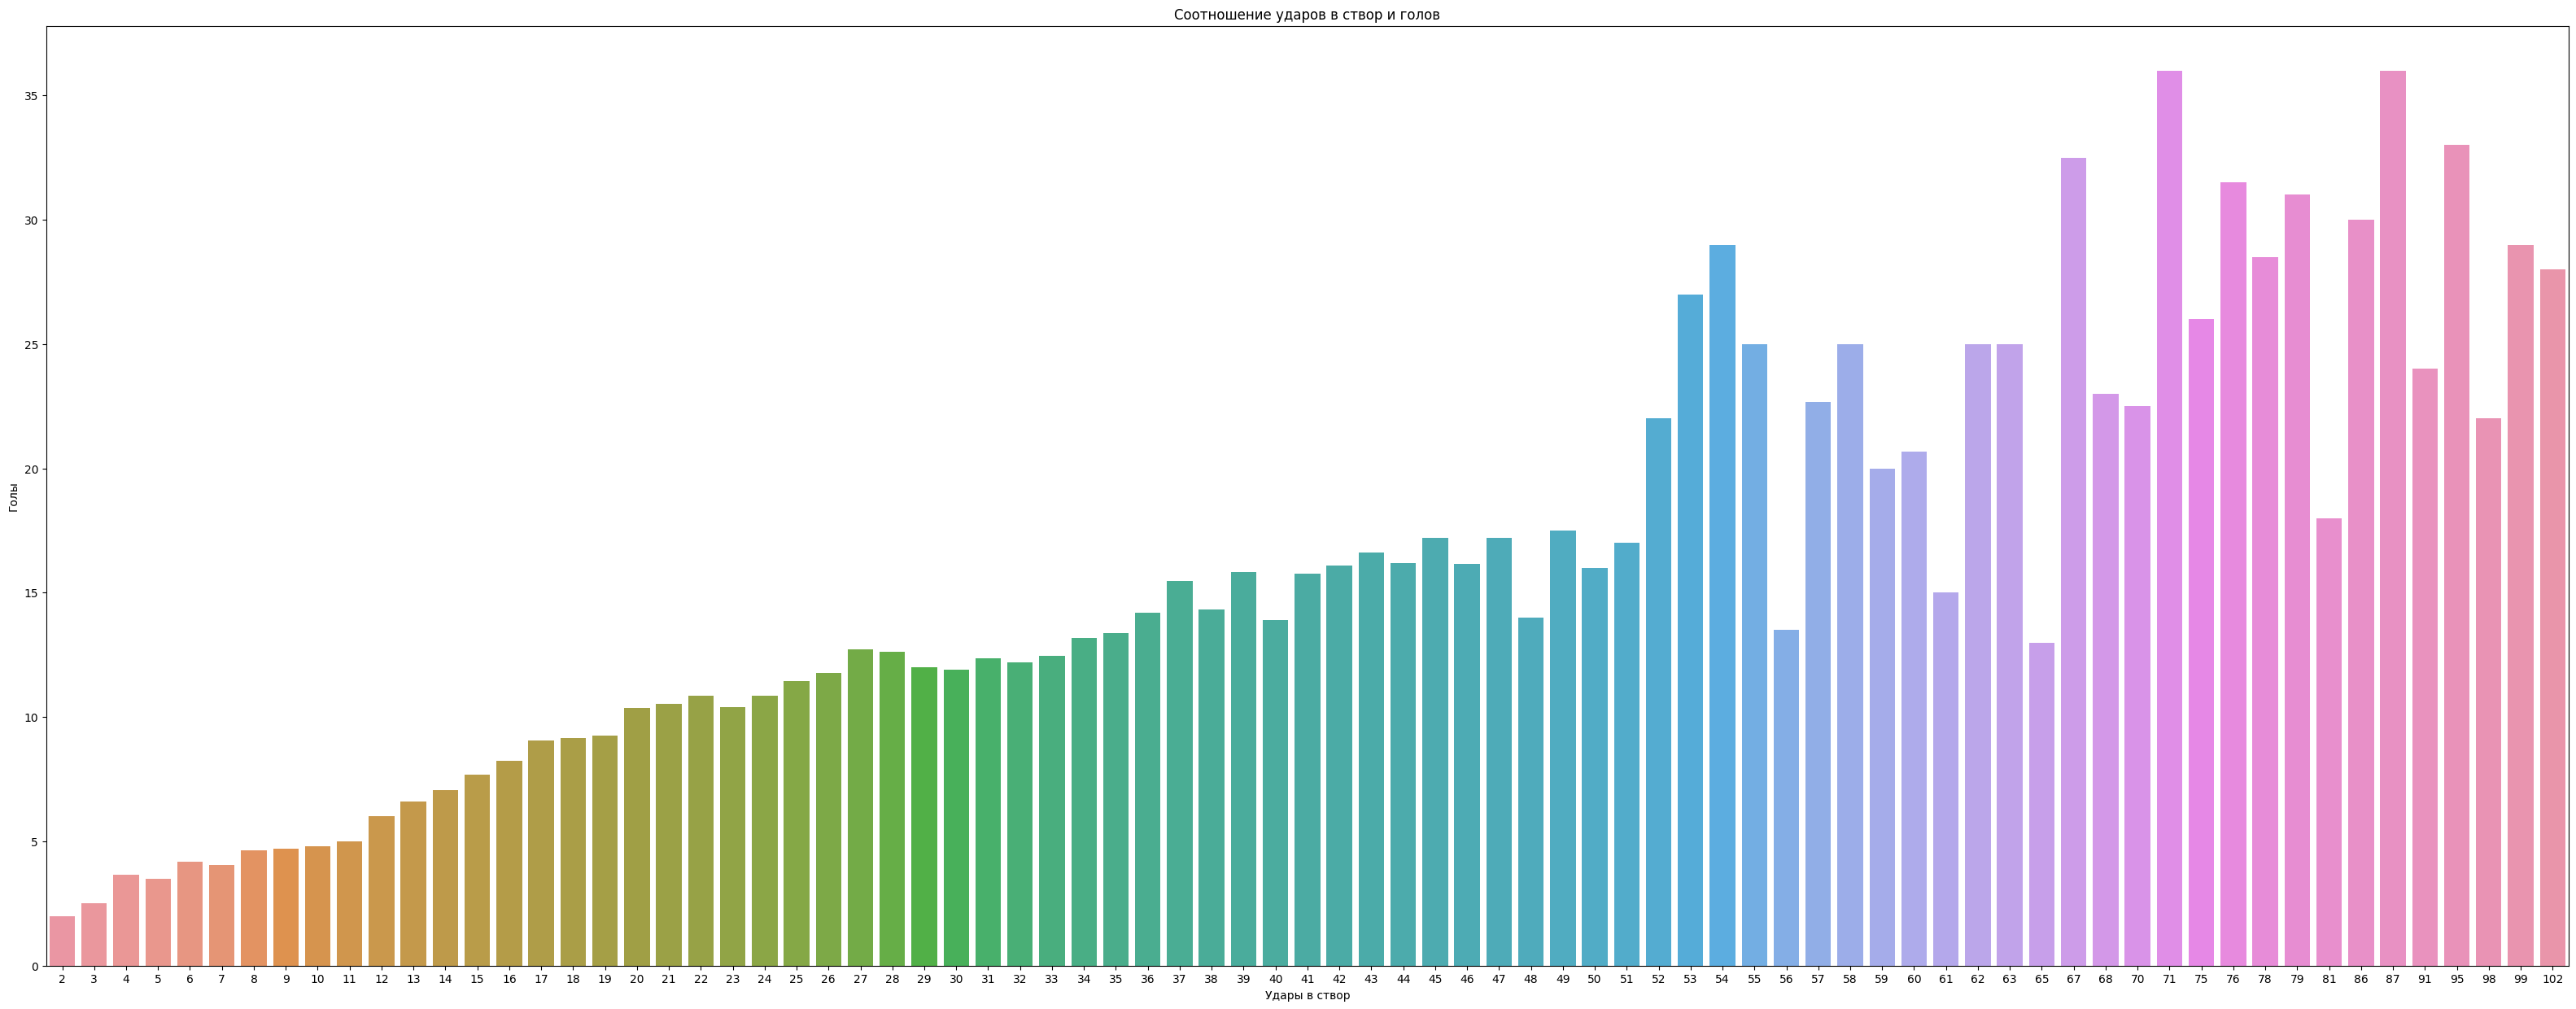

In [64]:
mean_purc1 = df.pivot_table(index='OnTarget',
                        values = 'Goals',
                        aggfunc = 'mean').sort_values(by = 'Goals')
plt.figure(figsize=(40,15))
sns.barplot(x = mean_purc1.index, y = mean_purc1['Goals'])
plt.title('Соотношение ударов в створ и голов')
plt.xlabel('Удары в створ')
plt.ylabel('Голы')

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler, Normalizer

In [66]:
df.head()

,Country,League,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year,AvgMinsGoals
0,Spain,La Liga,Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016,168.090909
1,Spain,La Liga,Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016,195.562500
2,Spain,La Liga,Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016,105.000000
3,Spain,La Liga,Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016,218.615385
4,Spain,La Liga,Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016,134.230769


## 4.Проведение корреляционного анализа данных. 

<Axes: title={'center': 'Heatmap корреляции'}>

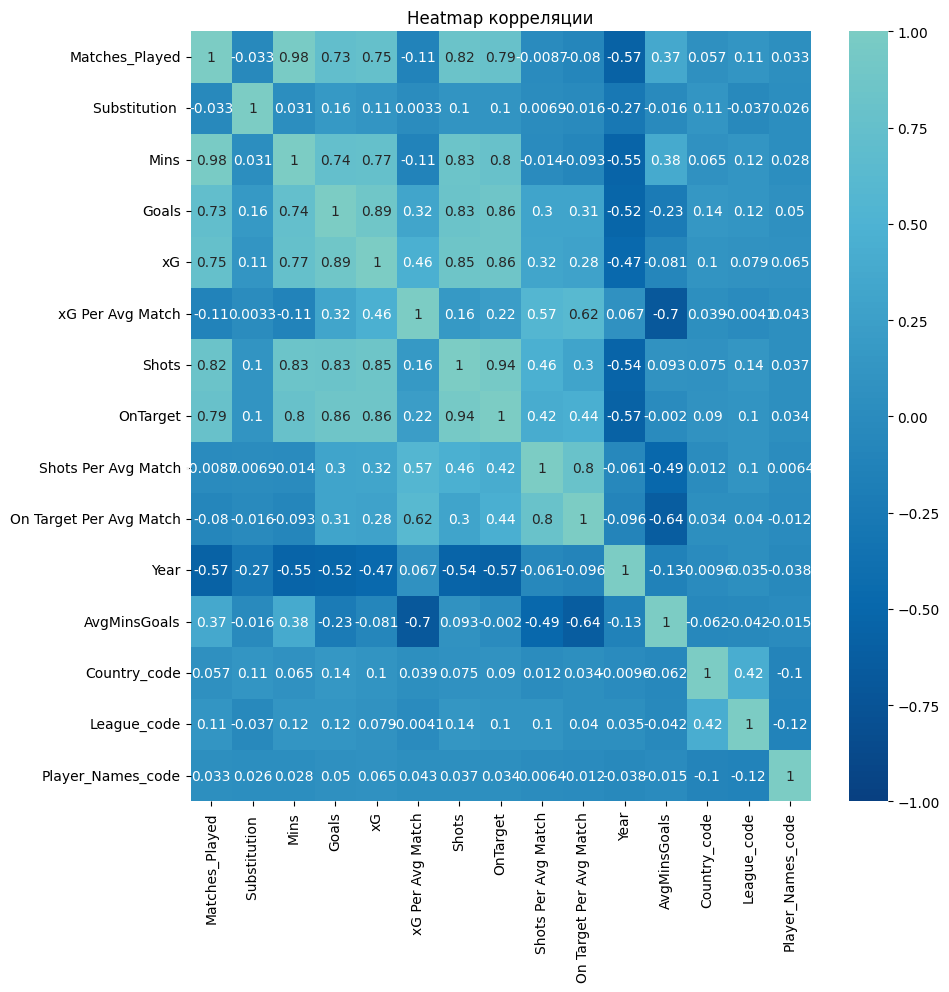

In [114]:
correlation=df.corr(method='spearman')
plt.figure(figsize=(10,10))
plt.title('Heatmap корреляции')
sns.heatmap(correlation,annot=True,vmin=-1,vmax=1,cmap="GnBu_r",center=1)

## 3. Кодирование категориальных признаков.

In [68]:
#Кодирование категориальных признаков

# меняем тип данных столбца
df["Country"] = df["Country"].astype('category')

df["League"] = df["League"].astype('category')


df["Player Names"] = df["Player Names"].astype('category')



#выводим закодированные столбцы
df["Country_code"] = df["Country"].cat.codes
df["League_code"] = df["League"].cat.codes
df["Player_Names_code"] = df["Player Names"].cat.codes

In [69]:
df = df.drop(['League', 'Country', 'Player Names'], axis=1)

In [70]:
df.head()

,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year,AvgMinsGoals,Country_code,League_code,Player_Names_code
0,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016,168.090909,7,23,227
1,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016,195.562500,7,23,37
2,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016,105.000000,7,23,273
3,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016,218.615385,7,23,384
4,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016,134.230769,7,23,240


# Разделение данных

Разделим данные на целевой столбец и признаки:

При построении предсказательных моделей исходные данные обычно разбиваются на обучающую ("training set") и контрольную ("test set") выборки. Обучающая выборка используется для построения математических отношений между некоторой переменной-откликом и предикторами, тогда как контрольная (= "проверочная") выборка служит для получения оценки прогнозных свойств модели на новых данных, т.е. данных, которые не были использованы для обучения модели. В нашем случае обучающая выборка - это голы, а проверочная - это все остальные признаки, которые потенциально могут влиять на решение клиента

In [71]:
X = df[['OnTarget', 'Matches_Played', 'xG', 'Mins', 'AvgMinsGoals']]
y = df['Goals']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [72]:
# Размер обучающей выборки
X_train.shape, y_train.shape

((462, 5), (462,))

In [73]:
# Размер тестовой выборки
X_test.shape, y_test.shape

((198, 5), (198,))

In [74]:
np.unique(y_train)

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 36], dtype=uint8)

In [75]:
np.unique(y_test)

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 22, 23, 24, 25, 28, 33, 34, 37], dtype=uint8)

## Модель ближайших соседей для произвольно заданного гиперпараметра K

### Напишем функцию, которая считает метрики построенной модели:

In [76]:
#Масштабирование данных
scaler = MinMaxScaler().fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_train.columns)
X_train.describe()

,OnTarget,Matches_Played,xG,Mins,AvgMinsGoals
count,462.000000,462.000000,462.000000,462.000000,462.000000
mean,0.260649,0.564093,0.312052,0.459861,0.355120
std,0.165068,0.277845,0.190210,0.235693,0.159865
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150000,0.284722,0.175895,0.253003,0.236072
50%,0.240000,0.611111,0.288056,0.507156,0.348442
75%,0.347500,0.805556,0.417364,0.656657,0.454187
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
def test_model(model):
    print("mean_absolute_error:",
          mean_absolute_error(y_test, model.predict(X_test)))
    print("mean_squared_error:",
          mean_squared_error(y_test, model.predict(X_test)))
    print("median_absolute_error:",
          median_absolute_error(y_test, model.predict(X_test)))
    print("r2_score:",
          r2_score(y_test, model.predict(X_test)))

Попробуем метод ближайших соседей с гиперпараметром K = 10:

In [78]:
reg_10 = KNeighborsRegressor(n_neighbors=10)
reg_10.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [79]:
test_model(reg_10)

mean_absolute_error: 0.9353535353535353
mean_squared_error: 2.0432323232323233
median_absolute_error: 0.5999999999999996
r2_score: 0.9422785116606185


In [80]:
from io import StringIO 
from IPython.display import Image
import graphviz 
import pydotplus
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from sklearn.datasets import load_iris, load_wine
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error, r2_score
from sklearn.svm import NuSVR
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline 

#### Линейная регрессия предсказывает непрерывную величину, например, курс валюты, стоимость недвижимости и прочее.
#### Логистическая регрессия используется для предсказания бинарной величины (да/нет), например, как в нашей задаче произойдет отток клиентов или нет

## Линейная регрессия

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [82]:
model = LinearRegression()

In [83]:
model.fit(X_train, y_train)

LinearRegression()

In [84]:
pd.DataFrame(model.coef_, X.columns, columns = ['Coeff'])

,Coeff
OnTarget,6.588085
Matches_Played,-0.642396
xG,10.376420
Mins,13.379726
AvgMinsGoals,-15.763226


In [85]:
predictions = model.predict(X_test)

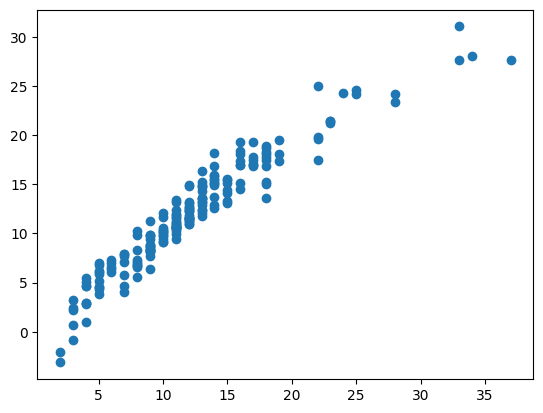

In [86]:
plt.scatter(y_test, predictions)

(array([ 6., 19., 62., 75., 21.,  7.,  5.,  2.,  0.,  1.]),
 array([-4.20438125, -2.85221141, -1.50004156, -0.14787172,  1.20429813,
         2.55646797,  3.90863782,  5.26080766,  6.61297751,  7.96514735,
         9.31731719]),
 <BarContainer object of 10 artists>)

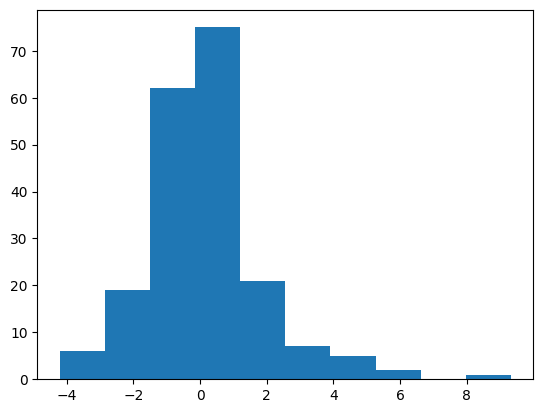

In [87]:
plt.hist(y_test - predictions)

## SVM

In [88]:
# SVM
scaler = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)
X_train_scaled.describe()

,OnTarget,Matches_Played,xG,Mins,AvgMinsGoals
count,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02
mean,1.038131e-16,-1.614870e-16,-1.384174e-16,1.461073e-16,-3.844928e-17
std,1.001084e+00,1.001084e+00,1.001084e+00,1.001084e+00,1.001084e+00
min,-1.580758e+00,-2.032445e+00,-1.642345e+00,-1.953219e+00,-2.223775e+00
25%,-6.710543e-01,-1.006582e+00,-7.166006e-01,-8.786111e-01,-7.454826e-01
50%,-1.252320e-01,1.694065e-01,-1.262902e-01,2.008810e-01,-4.181736e-02
75%,5.267225e-01,8.699954e-01,5.542615e-01,8.358763e-01,6.203600e-01
max,4.483934e+00,1.570584e+00,3.620706e+00,2.294195e+00,4.038266e+00


In [89]:
nusvr_05 = NuSVR(nu=0.7, gamma = 'scale')
nusvr_05.fit(X_train, y_train)

NuSVR(nu=0.7)

## Дерево решений

In [90]:
dt_none = DecisionTreeRegressor(max_depth=3)
dt_none.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

[Text(0.5, 0.875, 'x[2] <= 0.525\nsquared_error = 35.793\nsamples = 462\nvalue = 11.623'),
 Text(0.25, 0.625, 'x[0] <= 0.155\nsquared_error = 16.22\nsamples = 405\nvalue = 10.049'),
 Text(0.125, 0.375, 'x[0] <= 0.105\nsquared_error = 4.521\nsamples = 125\nvalue = 5.464'),
 Text(0.0625, 0.125, 'squared_error = 1.645\nsamples = 83\nvalue = 4.337'),
 Text(0.1875, 0.125, 'squared_error = 2.738\nsamples = 42\nvalue = 7.69'),
 Text(0.375, 0.375, 'x[2] <= 0.332\nsquared_error = 7.866\nsamples = 280\nvalue = 12.096'),
 Text(0.3125, 0.125, 'squared_error = 4.034\nsamples = 141\nvalue = 10.44'),
 Text(0.4375, 0.125, 'squared_error = 6.145\nsamples = 139\nvalue = 13.777'),
 Text(0.75, 0.625, 'x[4] <= 0.165\nsquared_error = 32.191\nsamples = 57\nvalue = 22.807'),
 Text(0.625, 0.375, 'x[3] <= 0.637\nsquared_error = 17.951\nsamples = 18\nvalue = 29.222'),
 Text(0.5625, 0.125, 'squared_error = 12.49\nsamples = 7\nvalue = 25.714'),
 Text(0.6875, 0.125, 'squared_error = 8.612\nsamples = 11\nvalue = 31.

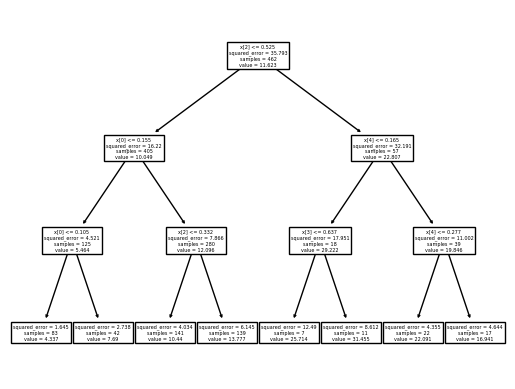

In [91]:
tree.plot_tree(dt_none)

In [92]:
clf = DecisionTreeClassifier(random_state=1)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [93]:
def test_model(model):
    print("mean_absolute_error:",
          mean_absolute_error(y_test, model.predict(X_test)))
    print("median_absolute_error:",
          median_absolute_error(y_test, model.predict(X_test)))
    print("r2_score:",
          r2_score(y_test, model.predict(X_test)))

In [94]:
test_model(dt_none)

mean_absolute_error: 1.950484498202909
median_absolute_error: 1.4925854287556426
r2_score: 0.812774189099532


In [95]:
def test_model1(model):
    print("mean_absolute_error:",
          mean_absolute_error(y, model.predict(X)))
    print("median_absolute_error:",
          median_absolute_error(y, model.predict(X)))
    print("r2_score:",
          r2_score(y, model.predict(X)))

In [96]:
test_model1(clf)

mean_absolute_error: 118.68181818181819
median_absolute_error: 8.0
r2_score: 0.2541163670768751


In [97]:
dt_none = DecisionTreeRegressor(max_depth=9)
dt_none.fit(X_train, y_train)
from IPython.core.display import HTML
from sklearn.tree import export_text
tree_rules = export_text(dt_none, feature_names=list(X.columns))
HTML('<pre>' + tree_rules + '</pre>')

In [98]:
# Визуализация дерева
def get_png_tree(tree_model_param, feature_names_param):
    dot_data = StringIO()
    export_graphviz(tree_model_param, out_file=dot_data, feature_names=feature_names_param,
                    filled=True, rounded=True, special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph.create_png()

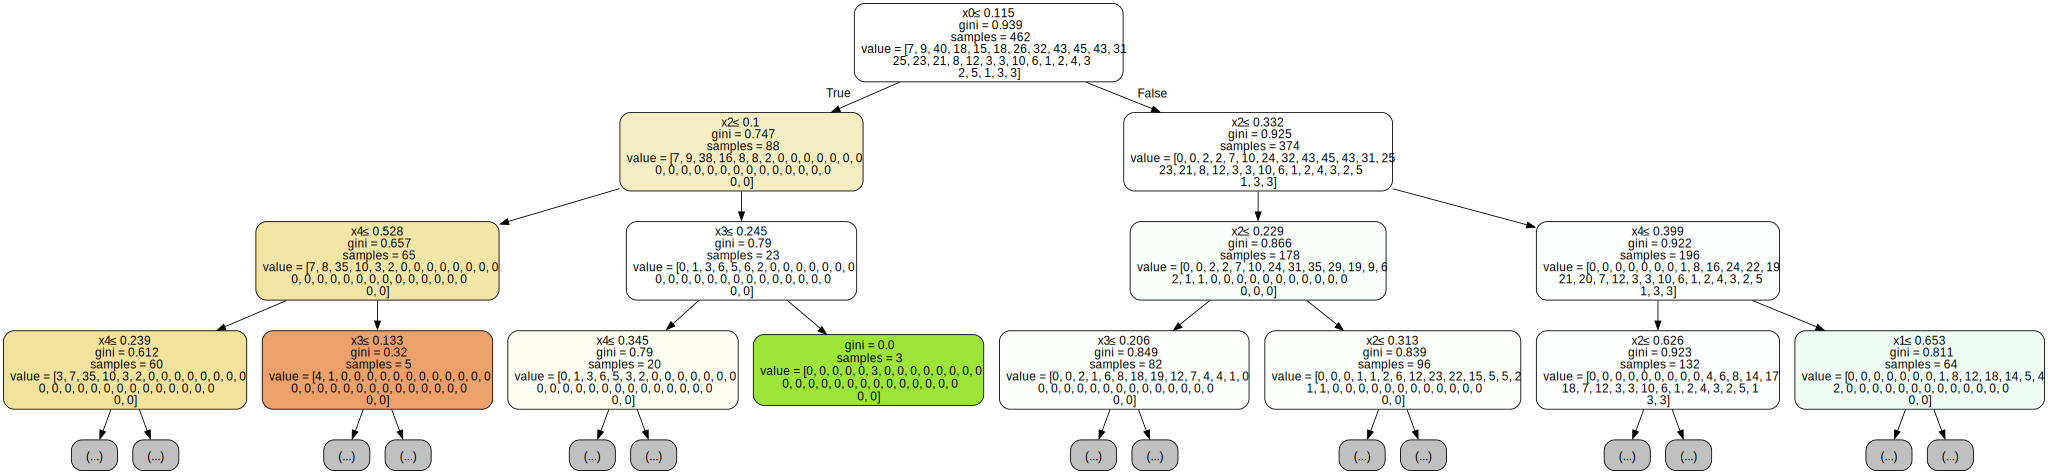

In [99]:

dot_data = export_graphviz(clf, out_file=None,  
                           filled=True, rounded=True, special_characters=True,max_depth=3)  
graph = graphviz.Source(dot_data)  
graph

## Важность признаков

In [100]:
list(zip(X_train.columns.values, clf.feature_importances_))

[('OnTarget', 0.13510645205704305),
 ('Matches_Played', 0.09809660152230082),
 ('xG', 0.16671668688601246),
 ('Mins', 0.2635162143464072),
 ('AvgMinsGoals', 0.33656404518823657)]

In [101]:
from operator import itemgetter

def draw_feature_importances(tree_model, x_dataset, figsize=(18,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(x_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

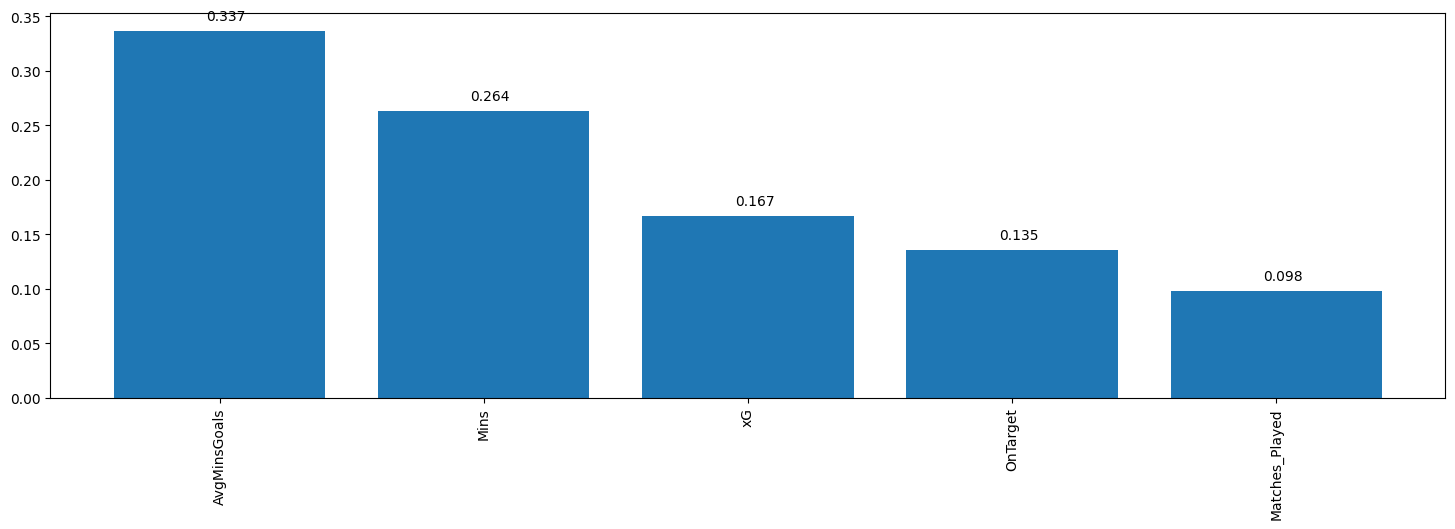

In [102]:
dt_fl, dt_fd = draw_feature_importances(clf, X_train)

In [103]:
from io import StringIO 
from IPython.display import Image
import graphviz 
import pydotplus
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error, r2_score
from sklearn.svm import NuSVR
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Matches_Played           660 non-null    uint8  
 1   Substitution             660 non-null    uint8  
 2   Mins                     660 non-null    uint16 
 3   Goals                    660 non-null    uint8  
 4   xG                       660 non-null    float64
 5   xG Per Avg Match         660 non-null    float64
 6   Shots                    660 non-null    uint8  
 7   OnTarget                 660 non-null    uint8  
 8   Shots Per Avg Match      660 non-null    float64
 9   On Target Per Avg Match  660 non-null    float64
 10  Year                     660 non-null    uint16 
 11  AvgMinsGoals             660 non-null    float64
 12  Country_code             660 non-null    int8   
 13  League_code              660 non-null    int8   
 14  Player_Names_code        6

In [105]:
#1. Модель бэггинга - случайный лес (Random Forest):

from sklearn.ensemble import RandomForestClassifier

# Создаем модель случайного леса с 100 деревьями
rf_model = RandomForestClassifier(n_estimators=100)

# Обучаем модель на тренировочных данных
rf_model.fit(X_train, y_train)

# Оцениваем качество модели на тестовых данных
accuracy = rf_model.score(X_test, y_test)
print("Accuracy:", accuracy)

#2. Модель бустинга - градиентный бустинг (Gradient Boosting):

from sklearn.ensemble import GradientBoostingClassifier

# Создаем модель градиентного бустинга с 100 деревьями и скоростью обучения 0.1
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)

# Обучаем модель на тренировочных данных
gb_model.fit(X_train, y_train)

# Оцениваем качество модели на тестовых данных
accuracy = gb_model.score(X_test, y_test)
print("Accuracy:", accuracy)


#3. Модель стекинга - мета-классификатор на основе логистической регрессии:


from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict

# Обучаем базовые модели на тренировочных данных
rf_preds = cross_val_predict(rf_model, X_train, y_train, cv=5, method='predict_proba')
gb_preds = cross_val_predict(gb_model, X_train, y_train, cv=5, method='predict_proba')

# Создаем мета-классификатор на основе логистической регрессии
meta_model = LogisticRegression()

# Обучаем мета-классификатор на прогнозах базовых моделей
meta_model.fit(np.hstack([rf_preds, gb_preds]), y_train)
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
rf_test_preds = rf_model.predict_proba(X_test)
gb_model.fit(X_train, y_train)
gb_test_preds = gb_model.predict_proba(X_test)

# Оцениваем качество модели на тестовых данных

meta_test_preds = meta_model.predict_proba(np.hstack([rf_test_preds, gb_test_preds]))
accuracy = meta_model.score(np.hstack([rf_test_preds, gb_test_preds]), y_test)
print("Accuracy:", accuracy)

Accuracy: 0.3939393939393939
Accuracy: 0.3484848484848485
Accuracy: 0.36363636363636365


Accuracy of Bagging Classifier: 35.86%
Accuracy of Random Forest Classifier: 39.90%
Accuracy of stacking Classifier: 36.36%


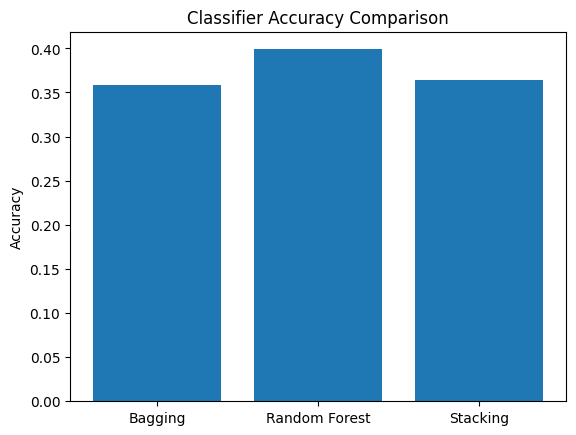

In [106]:
# Создаем три модели: решающее дерево, бэггинг и случайный лес

bg = gb_model
rf = rf_model

# Обучаем модели на обучающей выборке

bg.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Получаем предсказания на тестовой выборке

bg_pred = bg.predict(X_test)
rf_pred = rf.predict(X_test)

# Вычисляем точность предсказания каждой модели

bg_acc = accuracy_score(y_test, bg_pred)
rf_acc = accuracy_score(y_test, rf_pred)

# Выводим точность каждой модели на экран

print("Accuracy of Bagging Classifier: {:.2f}%".format(bg_acc*100))
print("Accuracy of Random Forest Classifier: {:.2f}%".format(rf_acc*100))
print("Accuracy of stacking Classifier: {:.2f}%".format(accuracy*100))

# Создаем график точности предсказания каждой модели
models = ['Bagging', 'Random Forest', 'Stacking']
accuracies = [ bg_acc, rf_acc, accuracy]
plt.bar(models, accuracies)
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy Comparison')
plt.show()